In [77]:
#2017-2021年の中学生のデータを取り込んで縦に繋げる
import pandas as pd
df1 = pd.read_csv('pref_2017.csv')
df2 = pd.read_csv('pref_2018.csv')
df3 = pd.read_csv('pref_2019.csv')
df4 = pd.read_csv('pref_2021.csv')
df1 = df1.rename(columns={'2017':'pref'})
df2 = df2.rename(columns={'2018':'pref'})
df3 = df3.rename(columns={'2019':'pref'})
df4 = df4.rename(columns={'2021':'pref'})
df_new = pd.concat([df1,df2,df3,df4], axis = 0)
print(df_new.head())
print(df_new.shape)


       pref  f_rate  gaku  life  sports  morals  jison
0  Hokkaido    3.39  65.0  5.10   40.70     4.9    5.1
1    Aomori    2.99  66.3  5.25   42.28     5.3    5.4
2     Iwate    2.56  63.8  5.20   44.22     5.5    5.1
3    Miyagi    4.34  65.0  5.35   42.01     4.8    5.0
4     Akita    2.45  70.0  6.15   44.22     5.9    5.9
(188, 7)


In [78]:
#都道府県と不登校率の列は不要なので削除
df_1 = df_new.drop(['pref', 'f_rate'], axis = 1)
df_1.head()

,gaku,life,sports,morals,jison
0,65.0,5.10,40.70,4.9,5.1
1,66.3,5.25,42.28,5.3,5.4
2,63.8,5.20,44.22,5.5,5.1
3,65.0,5.35,42.01,4.8,5.0
4,70.0,6.15,44.22,5.9,5.9


In [79]:
#データの標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df_1)

In [80]:
#tsneの実行
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0).fit_transform(sc_df)
tsne.shape

(188, 2)

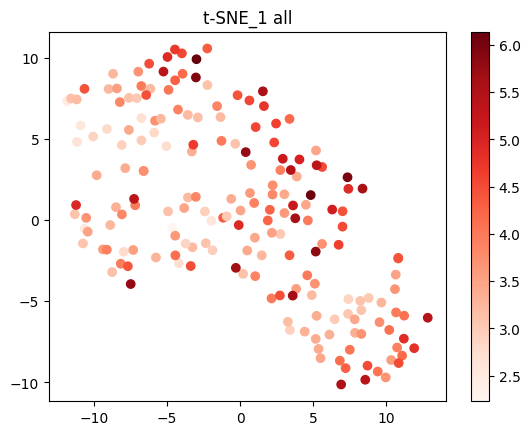

In [81]:
#t-SNEの結果を表示
import matplotlib.pyplot as plt
plt.scatter(tsne[:,0], tsne[:,1],cmap='Reds',c=df_new['f_rate'])
plt.title('t-SNE_1 all')
plt.colorbar()
plt.show()

In [82]:
#不登校率との相関係数を出すために都道府県を抜いたデータフレームを作る
df_2 = df_new.drop(['pref'],axis = 1)
df_2.head()

,f_rate,gaku,life,sports,morals,jison
0,3.39,65.0,5.10,40.70,4.9,5.1
1,2.99,66.3,5.25,42.28,5.3,5.4
2,2.56,63.8,5.20,44.22,5.5,5.1
3,4.34,65.0,5.35,42.01,4.8,5.0
4,2.45,70.0,6.15,44.22,5.9,5.9


In [84]:
#データを標準化して結果をデータフレームにする
sc_df_1 = sc.fit_transform(df_2)
sc_df_1 = pd.DataFrame(sc_df_1, columns = df_2.columns)
sc_df_1.head()

,f_rate,gaku,life,sports,morals,jison
0,-0.584186,0.746370,0.021380,-1.080034,-0.629584,0.103579
1,-1.053783,1.250551,0.467984,0.033089,0.711626,1.077221
2,-1.558600,0.280972,0.319116,1.399836,1.382230,0.103579
3,0.531107,0.746370,0.765719,-0.157128,-0.964886,-0.220968
4,-1.687739,2.685529,3.147606,1.399836,2.723440,2.699957


In [85]:
#相関係数を出す
corr = sc_df_1.corr()['f_rate']
corr

f_rate    1.000000
gaku     -0.610120
life     -0.096964
sports   -0.337618
morals   -0.134163
jison    -0.115427
Name: f_rate, dtype: float64

In [86]:
#gaku,sportsの2つを説明変数にして再度tsneを実行
sc_df_2 = sc_df_1.drop(['morals','life', 'jison'], axis = 1)
tsne_2 = TSNE(random_state = 0).fit_transform(sc_df_2)
tsne_2.shape

(188, 2)

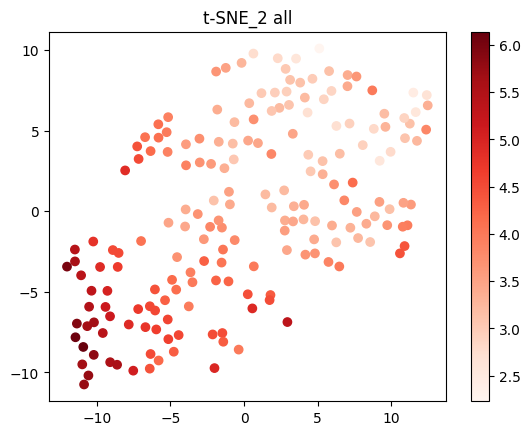

In [87]:
#tsneの結果を表示
plt.scatter(tsne_2[:,0], tsne_2[:,1],c=df_new['f_rate'],cmap='Reds')
plt.title('t-SNE_2 all')
plt.colorbar()
plt.show()

In [88]:
#PCAで累積寄与率が90%を超えるように次元削減してtsneを実行してみる
#PCAの実行
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, svd_solver='full')
pca_df = pca.fit_transform(sc_df)
pca_df.shape

(188, 3)

In [89]:
#tsneの実行
tsne_3 = TSNE(random_state = 0).fit_transform(pca_df)
tsne_3.shape

(188, 2)

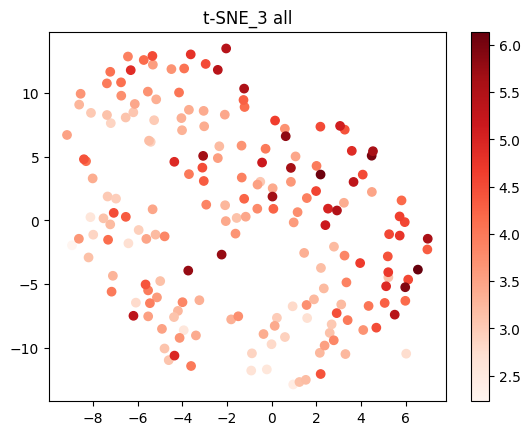

In [90]:
#PCAで３次元に削減してそれをさらにtsneの実行した結果を表示
plt.scatter(tsne_3[:,0],tsne_3[:,1],c=df_new['f_rate'],cmap='Reds')
plt.title('t-SNE_3 all')
plt.colorbar()
plt.show()

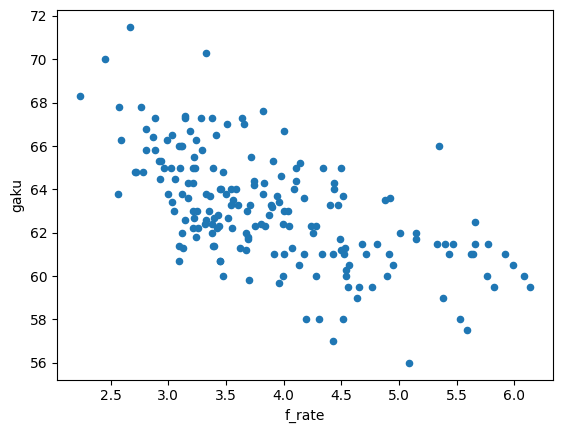

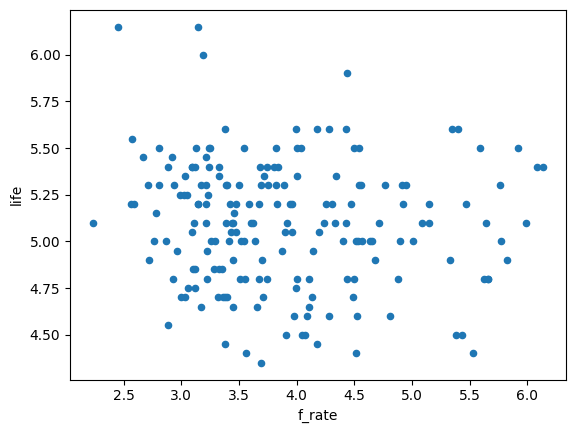

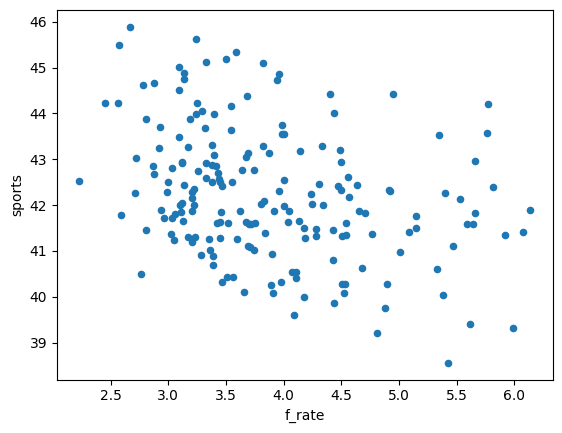

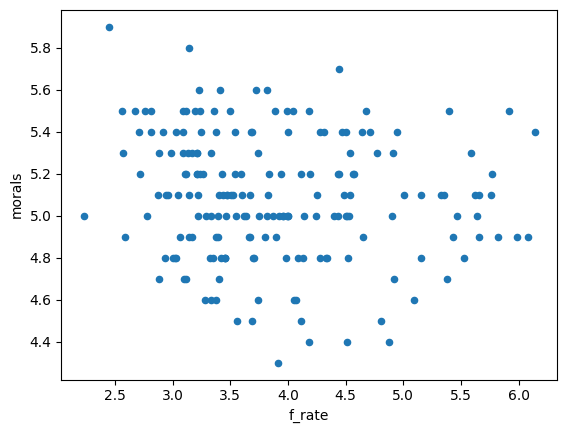

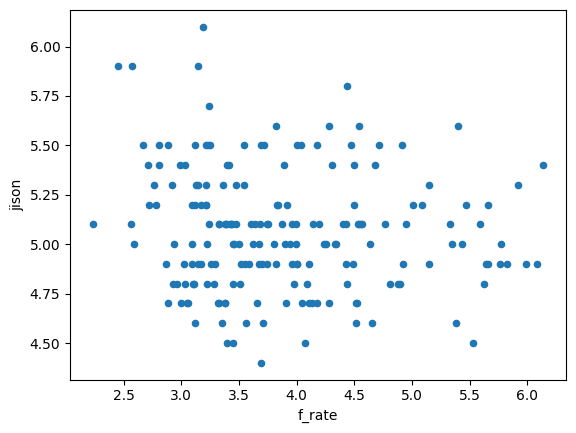

In [91]:
#散布図で相関を見てみる
for i in df_new.columns:
    if i == 'f_rate' or i == 'pref': 
        continue
    df_new.plot(kind = 'scatter', x = 'f_rate', y = i)

In [92]:
#目的変数を不登校率、説明変数を学力と体力テストの結果で重回帰分析
from sklearn.linear_model import LinearRegression
col = ['gaku', 'sports']
x = sc_df_1[col]
y = sc_df_1['f_rate']
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [93]:
#決定係数を表示
model.score(x,y)

0.3979634841691112